# Investigate the area of the Mandelbrot set
### Q1. Implement the iteration and create colourful pictures of the fractal

In question 1 we define the function `mendelbrot_set` and give the plot of the estimate aera $A_M$ of the Mandelbrot set.

From the image, the color bar on the right indicates the number of iterations. The central region, which is usually black or a darker shade, represents the points that belong to the Mandelbrot set. As the color temperature increases, so does the number of iterations, indicating that the corresponding complex points escape to infinity at a faster rate. The edges of the image, particularly the areas in red and yellow, represent points where the number of iterations is close to or has reached the set maximum limit.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

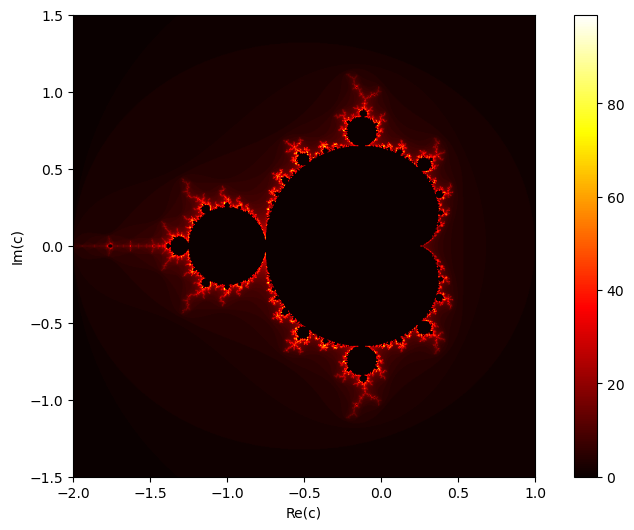

In [2]:
# Q1. Plot the Mendelbrot set

# Set the image width and height
width, height = 800, 800

# Define the function to generate the Mandelbrot set image
def mandelbrot_set(width, height, x_min, x_max, y_min, y_max, max_iter):
    # Create a black image
    image = np.zeros((height, width))
    # Generate a grid of complex numbers (the Mandelbrot set is defined in the complex plane)
    real_values = np.linspace(x_min, x_max, width)
    imaginary_values = np.linspace(y_min, y_max, height)
    # For every point in the grid, perform the Mandelbrot iteration
    for x in range(width):
        for y in range(height):
            c = complex(real_values[x], imaginary_values[y])
            z = 0
            for i in range(max_iter):
                z = z*z + c
                if (z.real*z.real + z.imag*z.imag) >= 4:
                    image[y, x] = i
                    break
    return image

# Generate the Mandelbrot set image with 100 iterations
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
max_iter = 100

image = mandelbrot_set(width, height, x_min, x_max, y_min, y_max, max_iter)


plt.figure(figsize=(10, 6))
plt.imshow(image, cmap='hot', extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
# plt.title('Mandelbrot Set')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.show()


We define the function `monte_carlo_mandelbrot_area` to estimate the area of the Mandelbrot set of each combination of iterations and samples, and then plot the results. Each line represents an estimate with a different number of iterations, ranging from 250 to 2500. The horizontal axis shows the number of samples on a logarithmic scale, while the vertical axis shows the corresponding area estimate values.

It can be seen from the graph that as the number of iterations $i$ and the number of samples $s$ increase, the area estimate values $A_{i,s}$ will converge to the theoratical area value $A_m$.

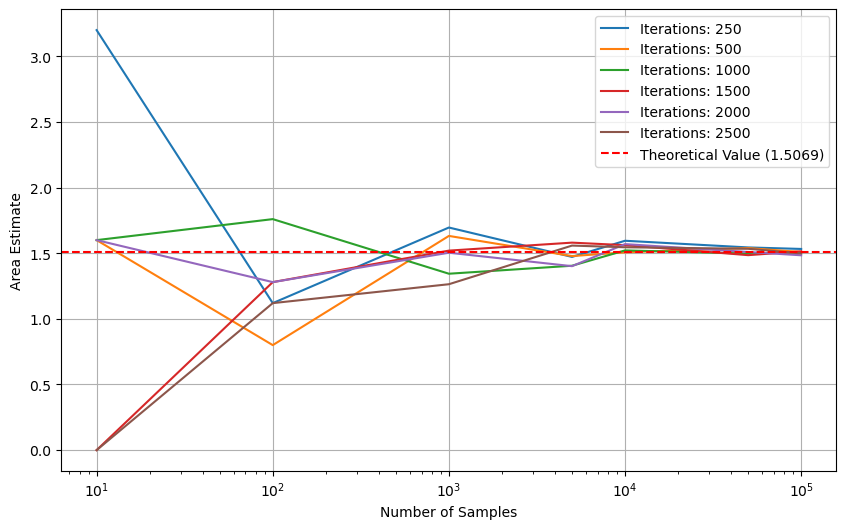

In [3]:
# Q1. Mandelbrot Area Estimates vs. Number of Samples and Iterations

# Define the function to check if a point is in the Mandelbrot set
def is_in_mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        z = z*z + c
        if abs(z) > 2:
            return False, n  # The sequence is unbounded
    return True, max_iter  # The sequence is presumed to be bounded

# Implement the Monte Carlo method to estimate the area of the Mandelbrot set
def monte_carlo_mandelbrot_area(iterations, samples, x_min=-2, x_max=2, y_min=-2, y_max=2):
    # Count the points inside the Mandelbrot set
    count_inside = 0
    # Record the iteration counts for points inside the Mandelbrot set
    iterations_to_escape = []
    
    # Area of the sample region
    sample_area = (x_max - x_min) * (y_max - y_min)
    
    for _ in range(samples):
        # Random point in the sample region
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)
        c = complex(x, y)
        
        # Check if the point is in the Mandelbrot set
        in_set, iter_count = is_in_mandelbrot(c, iterations)
        if in_set:
            count_inside += 1
            iterations_to_escape.append(iter_count)
    
    
    estimated_area = count_inside / samples * sample_area
    
    return estimated_area


iterations_list = [250, 500, 1000, 1500, 2000, 2500]
samples_list = [10, 100, 1000, 5000, 10000, 50000, 100000]

# Running the estimation for different combinations of iterations and samples
results = {}     # Store results {iterations: {samples: result}}

for iterations in iterations_list:
    results[iterations] = {}
    for samples in samples_list:
        area_estimate = monte_carlo_mandelbrot_area(iterations, samples)
        results[iterations][samples] = {
            'area_estimate': area_estimate,
        }

results  # Output a summary of results

# Create a plot for each number of iterations
plt.figure(figsize=(10, 6))
for iterations in iterations_list:
    sample_sizes = []
    area_estimates = []
    for samples in samples_list:
        sample_sizes.append(samples)
        area_estimates.append(results[iterations][samples]['area_estimate'])

    plt.plot(sample_sizes, area_estimates, label=f'Iterations: {iterations}')

# Give theoretical area value and plot
theoretical_value = 1.5069  
plt.axhline(y=theoretical_value, color='r', linestyle='--', label='Theoretical Value (1.5069)')


# plt.title('Mandelbrot Area Estimates vs. Number of Samples and Iterations')
plt.xlabel('Number of Samples')
plt.ylabel('Area Estimate')
plt.legend()
plt.xscale('log')  # Use logarithmic scale for better visibility
plt.grid(True)
plt.show()

We plot the Monte Carlo approximations of the Mandelbrot set with increasing iterations $i$. At lower iterations (such as $i=1,2$), the distribution of points is almost random with no discernible structure. However, as the number of iterations increases, the typical shape of the Mandelbrot set begins to emerge, especially in the images after $i=8$. This is because with each iteration, more points are excluded as they escape to the exterior of the set, while those that remain gradually map out the boundary of the set.

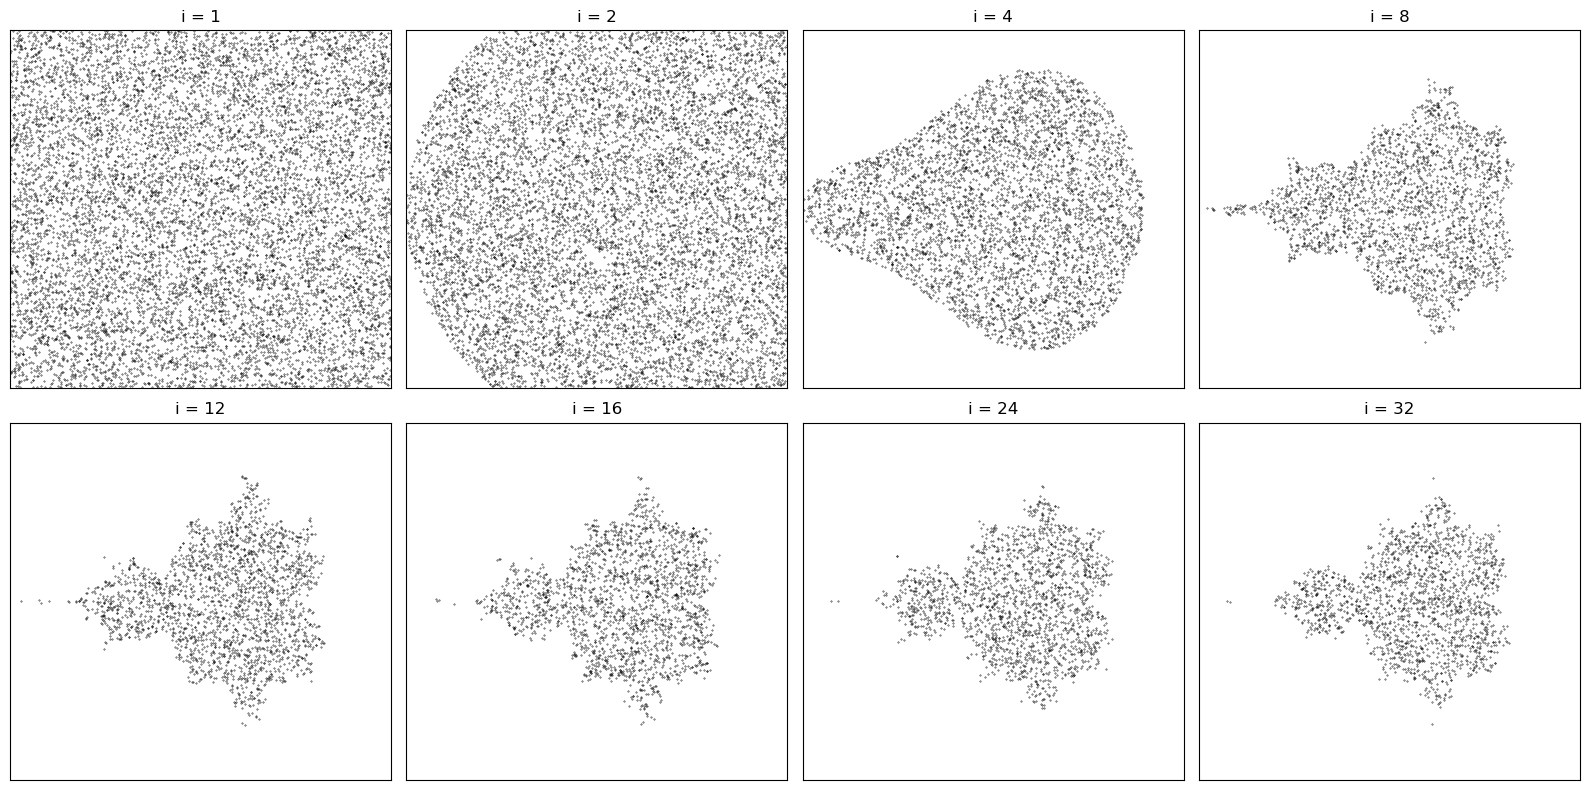

In [4]:
# Q1. Monte Carlo approximations of the Mandelbrot set with increasing iterations

# Define mandelbrot set
def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return False
        z = z * z + c
    return True

# Set up the figure and axes
fig, axes = plt.subplots(2, 4, figsize=(16, 8), subplot_kw={'xticks': [], 'yticks': []})

# Parameters for the grid
real_bounds = [-2, 1]
imag_bounds = [-1.5, 1.5]
sample_size_per_subplot = 10000  # Number of points to sample per subplot

# Different iteration counts
i_values = [1, 2, 4, 8, 12, 16, 24, 32]

# Generate plots
for ax, iterations in zip(axes.flat, i_values):
    # Sample points
    real_samples = np.random.uniform(low=real_bounds[0], high=real_bounds[1], size=sample_size_per_subplot)
    imag_samples = np.random.uniform(low=imag_bounds[0], high=imag_bounds[1], size=sample_size_per_subplot)
    c_samples = real_samples + imag_samples * 1j

    # Check if each sampled point is in the Mandelbrot set
    in_set = [mandelbrot(c, iterations) for c in c_samples]

    # Scatter plot for points in the Mandelbrot set
    ax.scatter(real_samples[in_set], imag_samples[in_set], color='black', s=0.1)
    # Set the title for the current subplot
    ax.set_title(f'i = {iterations}')
    ax.set_xlim(real_bounds)
    ax.set_ylim(imag_bounds)

# Display
plt.tight_layout()
plt.show()


### Q2. Investigate the convergence of $A_{i,s}$ $\rightarrow$ $A_m$

To get a good balance of $i$ and $s$, we define the function `balance_i_s` and perform multiple calculations of different combinations of $i$ and $s$, looking for combinations where the standard deviation (error) is low. We print the mean and standard deviation results for each combination and plot the standard deviation using a line chart, with each combination being run 15 times. 

iterations: 50, samples: 1000, mean estimated area: 1.6320000000000003, std dev: 0.13676646762516997
iterations: 50, samples: 10000, mean estimated area: 1.5965866666666666, std dev: 0.029841131941592873
iterations: 50, samples: 100000, mean estimated area: 1.5857386666666666, std dev: 0.015285024421163196
iterations: 100, samples: 1000, mean estimated area: 1.5914666666666668, std dev: 0.1436875622855213
iterations: 100, samples: 10000, mean estimated area: 1.5348266666666668, std dev: 0.03973014752328794
iterations: 100, samples: 100000, mean estimated area: 1.545504, std dev: 0.010559644438458443
iterations: 200, samples: 1000, mean estimated area: 1.6309333333333333, std dev: 0.10684784612813786
iterations: 200, samples: 10000, mean estimated area: 1.525226666666667, std dev: 0.044961486729076135
iterations: 200, samples: 100000, mean estimated area: 1.5293439999999998, std dev: 0.015171937604230601


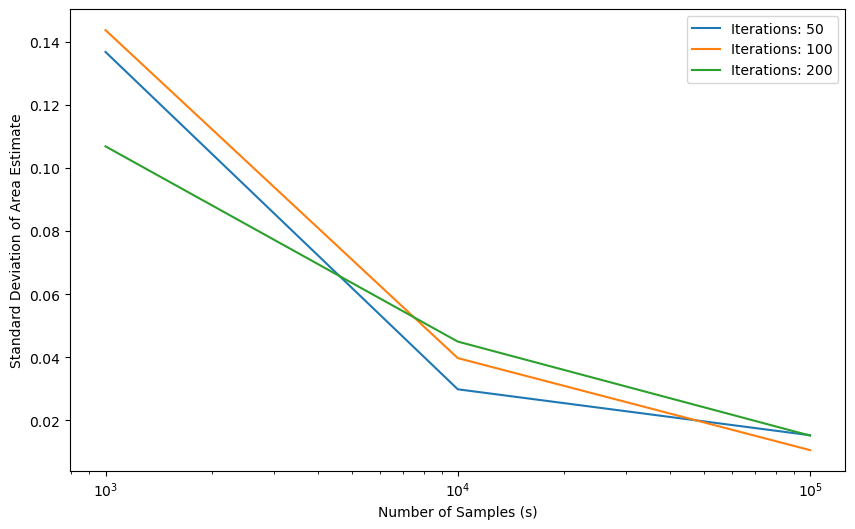

In [5]:
# Q2. Balance i and s according to the standard deviation

# Function to balance i and s, print the mean value and standard deviation
def balance_i_s(iter_range, sample_range, trials):
    results = {}
    for max_iter in iter_range:
        for num_samples in sample_range:
            area_estimates = [monte_carlo_mandelbrot_area(max_iter, num_samples) for _ in range(trials)]
            mean_area = np.mean(area_estimates)
            std_area = np.std(area_estimates)
            if max_iter not in results:
                results[max_iter] = {}
            results[max_iter][num_samples] = (mean_area, std_area)
            print(f"iterations: {max_iter}, samples: {num_samples}, mean estimated area: {mean_area}, std dev: {std_area}")
    return results

# Ranges of iteration and sample, the number of trials
iter_range = [50, 100, 200]
sample_range = [1000, 10000, 100000]
trials = 15

# Perform the balance and get the results
balanced_results = balance_i_s(iter_range, sample_range, trials)

# Plotting the standard deviation for different i and s combinations
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each combination
for max_iter in iter_range:
    std_devs = [balanced_results[max_iter][num_samples][1] for num_samples in sample_range]
    ax.plot(sample_range, std_devs, label=f'Iterations: {max_iter}')

ax.set_xscale('log')
ax.set_xlabel('Number of Samples (s)')
ax.set_ylabel('Standard Deviation of Area Estimate')
# ax.set_title('Standard Deviation for Different i and s Combinations')
ax.legend()
plt.show()

Due to the limitations of computing resources and efficiency, based on the results, we have ultimately chosen **100 iterations and 100,000 samples** as our final balance values. By comparing the absolute difference of $A_{j,s}$ and $A_{i,s}$, we can observe how the estimated area converges to the true area of the Mandelbrot set as the number of iterations increases.

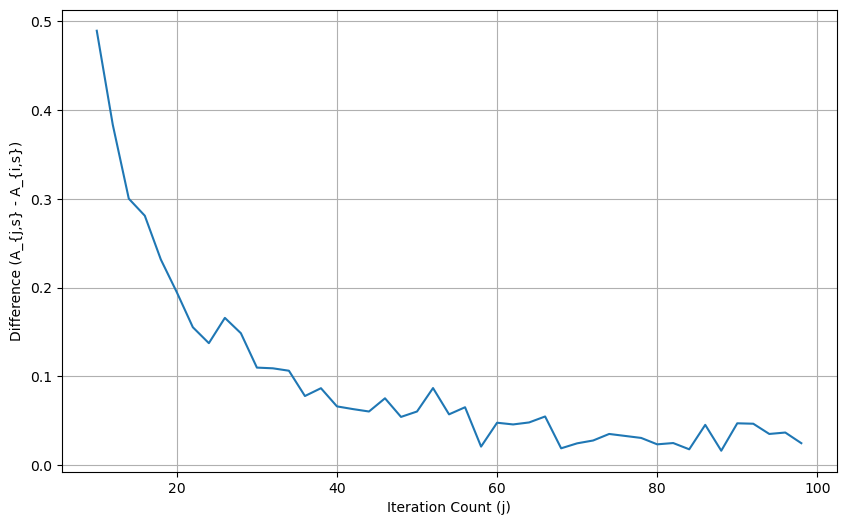

In [6]:
# Q2. Convergence Analysis of Mandelbrot Area Estimate

# Given balanced i and s
i = 100 
s = 100000
j_values = range(10, i, 2)  

# Estimate area of i
area_i_s = monte_carlo_mandelbrot_area(i, s)

# Estimate area of different j and calculate the difference
differences = []
for j in j_values:
    area_j_s  = monte_carlo_mandelbrot_area(j, s)
    diff = area_j_s - area_i_s
    differences.append(diff)

# Plot the results
plt.figure(figsize=(10, 6))   
plt.plot(j_values, differences)
plt.xlabel('Iteration Count (j)')
plt.ylabel('Difference (A_{j,s} - A_{i,s})')
# plt.title('Convergence Analysis of Mandelbrot Area Estimate')
plt.grid(True)
plt.show()


### Q3. Compare the quality of the results obtained using three sampling techniques
We compare the quality of the results obtained using three kinds of sampling:
- Pure random sampling
- Latin hypercube sampling
- Orthogonal sampling


In [7]:
# Q3. Define three kinds of sampling

# Pure random sampling
def pure_random_sampling(num_samples, max_iter):
    count = 0
    for _ in range(num_samples):
        real = np.random.uniform(-2, 1)
        imag = np.random.uniform(-1.5, 1.5)
        c = complex(real, imag)
        if mandelbrot(c, max_iter):
            count += 1
    return count / num_samples * 9

# Latin hypercube sampling
def latin_hypercube_sampling(num_samples, max_iter):
    from scipy.stats import qmc
    sampler = qmc.LatinHypercube(d=2)
    sample = sampler.random(n=num_samples)
    sample[:, 0] = sample[:, 0] * 3 - 2  # Scale to -2 to 1
    sample[:, 1] = sample[:, 1] * 3 - 1.5  # Scale to -1.5 to 1.5
    count = 0
    for s in sample:
        c = complex(s[0], s[1])
        if mandelbrot(c, max_iter):
            count += 1
    return count / num_samples * 9

# Orthogonal sampling 
def orthogonal_sampling(num_samples, max_iter):
    count = 0
    n = int(np.sqrt(num_samples))  
    for i in range(n):
        for j in range(n):
            real = np.random.uniform(-2 + (3 / n) * i, -2 + (3 / n) * (i + 1))
            imag = np.random.uniform(-1.5 + (3 / n) * j, -1.5 + (3 / n) * (j + 1))
            c = complex(real, imag)
            if mandelbrot(c, max_iter):
                count += 1
    return count / num_samples * 9

In [8]:
# Compute mean value and standard deviation
def compute_accuracy(method, num_samples, max_iter, num_runs):
    areas = [method(num_samples, max_iter) for _ in range(num_runs)]
    mean_area = np.mean(areas)
    std_dev = np.std(areas)
    return mean_area, std_dev

The resulting graph visually emphasizes how the standard deviation of the estimated area changes with the number of iterations for each sampling method. To get obvious results, we set the number of samples and the maximum number of iterations to 10,000 and 100, and the number of runs for the experiment is set to 80.

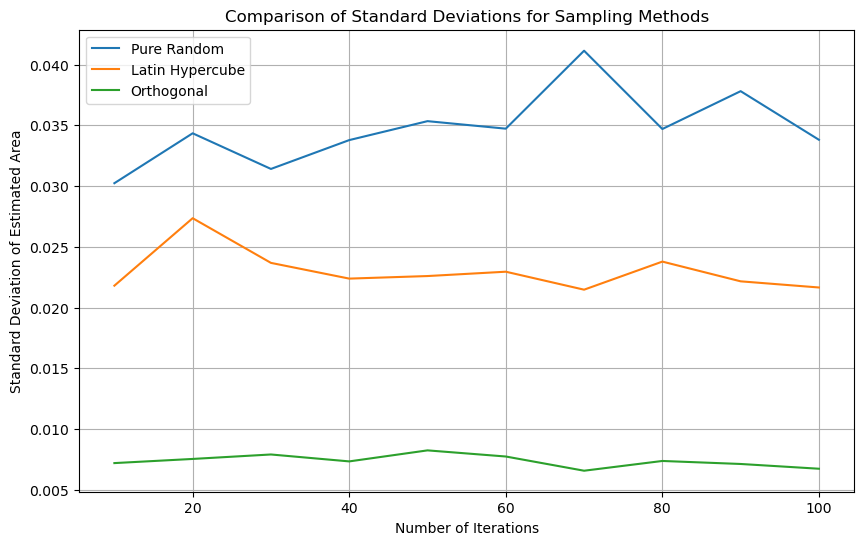

In [9]:
# Q3. Comparison of Standard Deviations for three kinds of sampling Methods

# Given number of samples and iterations
num_samples = 10000
max_iter = 100
num_runs = 80

# Calculate mean value and standard deviation
std_devs_data = {'Pure Random': [], 'Latin Hypercube': [], 'Orthogonal': []}
for max_iter in range(10, 101, 10):
    for method_name, method in zip(std_devs_data.keys(), [pure_random_sampling, latin_hypercube_sampling, orthogonal_sampling]):
        _, std_dev = compute_accuracy(method, num_samples, max_iter, num_runs)
        std_devs_data[method_name].append(std_dev)

# Plot
plt.figure(figsize=(10, 6))
for method_name, std_devs in std_devs_data.items():
    plt.plot(range(10, 101, 10), std_devs, label=method_name)

plt.xlabel('Number of Iterations')
plt.ylabel('Standard Deviation of Estimated Area')
plt.title('Comparison of Standard Deviations for Sampling Methods')
plt.legend()
plt.grid(True)
plt.show()



We plot the graph to illustrate the convergence of mean estimated area values to the theoretical value of the Mandelbrot set as the number of iterations increases, comparing the performance of three kinds of sampling methods.

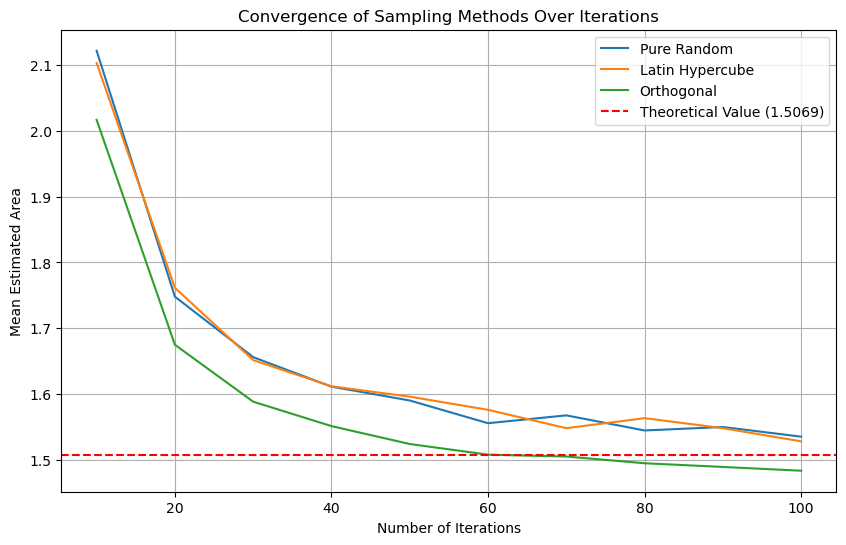

In [10]:
#Q3. Convergence of Sampling Methods Over Iterations

# Given number of samples and iterations
num_samples = 1000
max_iter = 100
num_runs = 80

# Calculate the estimated area 
convergence_data = {'Pure Random': [], 'Latin Hypercube': [], 'Orthogonal': []}
for max_iter in range(10, 101, 10):
    for method_name, method in zip(convergence_data.keys(), [pure_random_sampling, latin_hypercube_sampling, orthogonal_sampling]):
        mean_area, _ = compute_accuracy(method, num_samples, max_iter, num_runs)
        convergence_data[method_name].append(mean_area)

plt.figure(figsize=(10, 6))

# Comparison of convergence rates
for method_name, mean_areas in convergence_data.items():
    plt.plot(range(10, 101, 10), mean_areas, label=method_name)

plt.axhline(y=1.5069, color='red', linestyle='--', label='Theoretical Value (1.5069)')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Estimated Area')
plt.title('Convergence of Sampling Methods Over Iterations')
plt.legend()
plt.grid(True)
plt.show()



### Q4. New method to improve the convergence rate of the Monte Carlo approach: Stratified Sampling

We first give the new sampling method ' Enhanced Stratified Sampling' and test its performance. Like the method in Q3, we compare the standard deviation and convergence process of the two sampling method. To make proper use of computing resources, we set the number of samples and the maximum number of iterations to 5,000 and 100, and the number of runs for the experiment is set to 80.

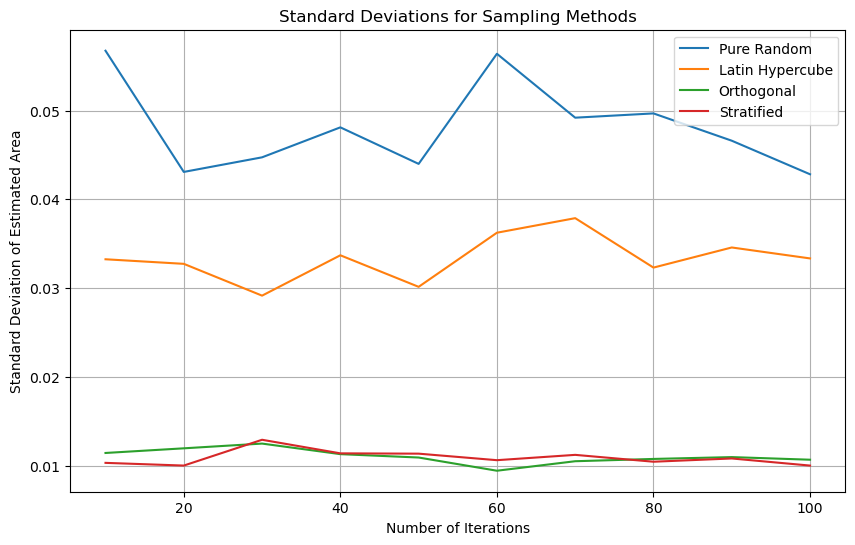

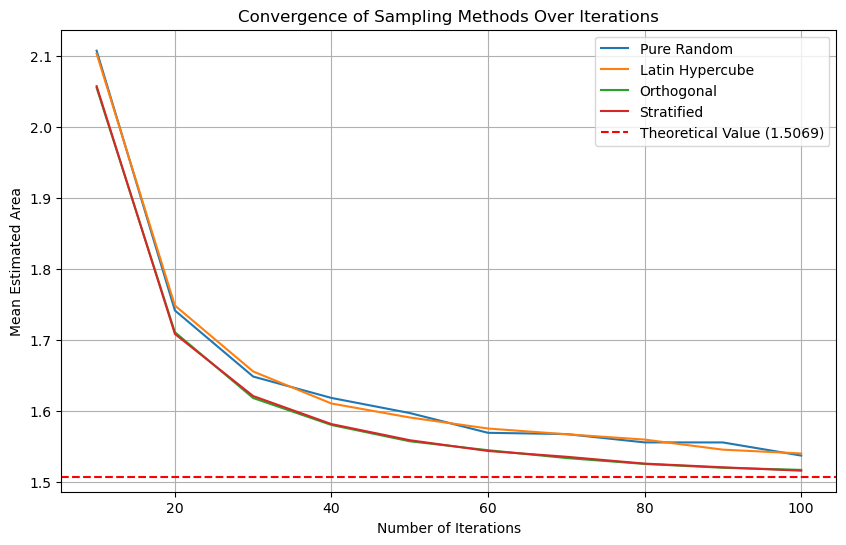

In [11]:
# Q4. First try: Stratified Sampling

# Stratified Sampling
def stratified_sampling(num_samples, max_iter):
    count = 0
    n = int(np.sqrt(num_samples))
    for i in range(n):
        for j in range(n):
            real = np.random.uniform(-2 + (3 / n) * i, -2 + (3 / n) * (i + 1))
            imag = np.random.uniform(-1.5 + (3 / n) * j, -1.5 + (3 / n) * (j + 1))
            c = complex(real, imag)
            if mandelbrot(c, max_iter):
                count += 1
    return count / num_samples * 9

# Given number of samples and iterations
num_samples = 5000
max_iter = 100
num_runs = 80

# Data structures for comparisons
methods = [pure_random_sampling, latin_hypercube_sampling, orthogonal_sampling, stratified_sampling]
method_names = ['Pure Random', 'Latin Hypercube', 'Orthogonal', 'Stratified']
std_devs_data = {name: [] for name in method_names}
convergence_data = {name: [] for name in method_names}

# Comparisons
for max_iter in range(10, 101, 10):
    for method_name, method in zip(method_names, methods):
        _, std_dev = compute_accuracy(method, num_samples, max_iter, num_runs)
        std_devs_data[method_name].append(std_dev)
        mean_area, _ = compute_accuracy(method, num_samples, max_iter, num_runs)
        convergence_data[method_name].append(mean_area)

# Plotting Standard Deviation Comparison
plt.figure(figsize=(10, 6))
for method_name, std_devs in std_devs_data.items():
    plt.plot(range(10, 101, 10), std_devs, label=method_name)
plt.xlabel('Number of Iterations')
plt.ylabel('Standard Deviation of Estimated Area')
plt.title('Standard Deviations for Sampling Methods')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Convergence Rate Comparison
plt.figure(figsize=(10, 6))
for method_name, mean_areas in convergence_data.items():
    plt.plot(range(10, 101, 10), mean_areas, label=method_name)
plt.axhline(y=1.5069, color='red', linestyle='--', label='Theoretical Value (1.5069)')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Estimated Area')
plt.title('Convergence of Sampling Methods Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

In a better case, we allocate sampling points according to the statistical characteristics of each layer to optimize resource utilization. We combine Stratified sampling and Importance sampling and test its behavior under the same setting(number of samples = 5000, max iterations = 100, number of runs = 80).

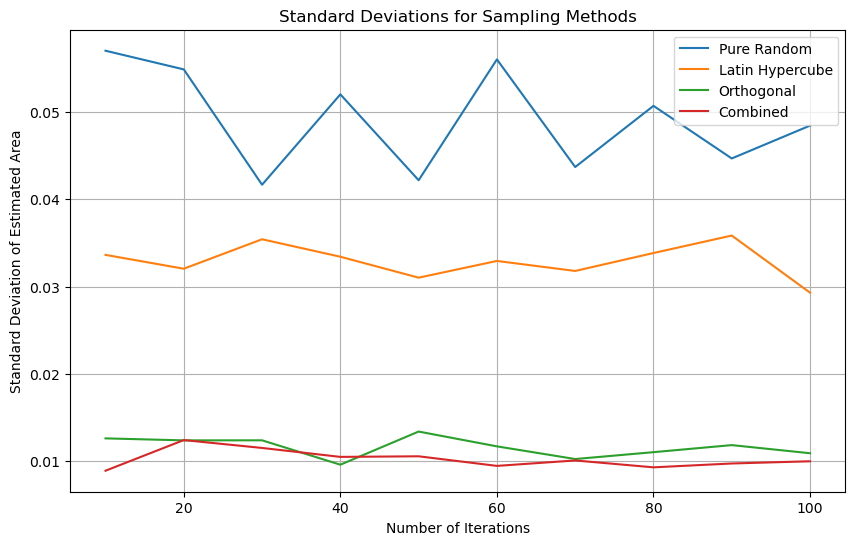

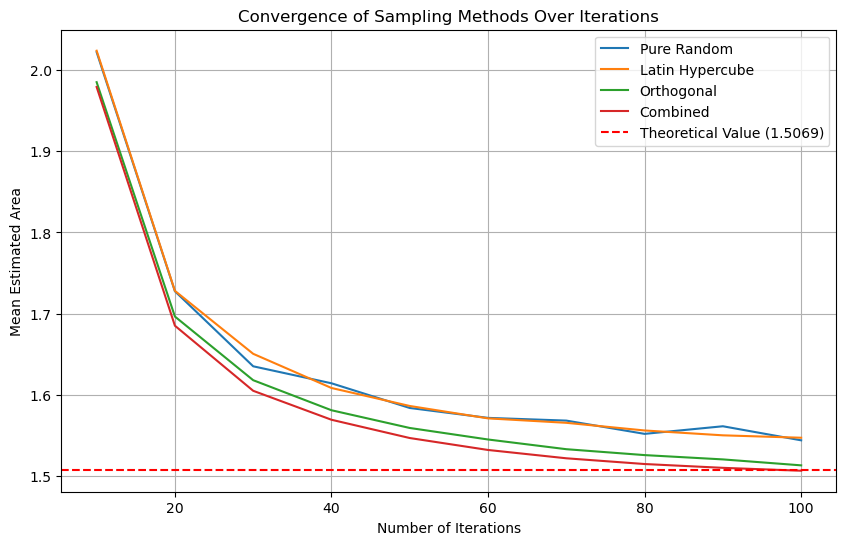

In [13]:
#Q4. Combined Stratified and Importance Sampling

# Combined sampling
def combined_sampling(num_samples, max_iter):
    count = 0
    n = int(np.sqrt(num_samples))
    for i in range(n):
        for j in range(n):
            # Adjust sampling density near the boundaries
            if i < n/4 or i > 3*n/4 or j < n/4 or j > 3*n/4:
                real = -2 + (3 / n) * i + (np.random.rand() * 3 / n)
                imag = -1.5 + (3 / n) * j + (np.random.rand() * 3 / n)
            else:
                real = -2 + (3 / n) * i + (np.random.rand() * 3 / (2*n))
                imag = -1.5 + (3 / n) * j + (np.random.rand() * 3 / (2*n))
            c = complex(real, imag)
            if mandelbrot(c, max_iter):
                count += 1
    return count / num_samples * 9

# Compute mean value and standard deviation
def compute_accuracy(method, num_samples, max_iter, num_runs):
    areas = [method(num_samples, max_iter) for _ in range(num_runs)]
    mean_area = np.mean(areas)
    std_dev = np.std(areas)
    return mean_area, std_dev

# Given number of samples and iterations
num_samples = 5000
max_iter = 100
num_runs = 80

# Data structures for comparisons
methods = [pure_random_sampling, latin_hypercube_sampling, orthogonal_sampling, combined_sampling]
method_names = ['Pure Random', 'Latin Hypercube', 'Orthogonal', 'Combined']
std_devs_data = {name: [] for name in method_names}
convergence_data = {name: [] for name in method_names}

# Comparisons
for max_iter in range(10, 101, 10):
    for method_name, method in zip(method_names, methods):
        _, std_dev = compute_accuracy(method, num_samples, max_iter, num_runs)
        std_devs_data[method_name].append(std_dev)
        mean_area, _ = compute_accuracy(method, num_samples, max_iter, num_runs)
        convergence_data[method_name].append(mean_area)

# Plotting Standard Deviation Comparison
plt.figure(figsize=(10, 6))
for method_name, std_devs in std_devs_data.items():
    plt.plot(range(10, 101, 10), std_devs, label=method_name)
plt.xlabel('Number of Iterations')
plt.ylabel('Standard Deviation of Estimated Area')
plt.title('Standard Deviations for Sampling Methods')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Convergence Rate Comparison
plt.figure(figsize=(10, 6))
for method_name, mean_areas in convergence_data.items():
    plt.plot(range(10, 101, 10), mean_areas, label=method_name)
plt.axhline(y=1.5069, color='red', linestyle='--', label='Theoretical Value (1.5069)')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Estimated Area')
plt.title('Convergence of Sampling Methods Over Iterations')
plt.legend()
plt.grid(True)
plt.show()
